# Hello! Welcome to non-boring's project!
Below is our group's code which aims to help us understand the trends of COVID-19 deaths in the USA, and also forecast the number of COVID-19 deaths in the near future.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_table_for_daily_death_trends__the_united_states.csv')

## Exploratory Analysis
Here, we explore the trends of the data, as well as clean the data.

In [3]:
#Get a sensing of what the data includes
df

,State,Date,New Deaths,Historic Deaths
0,United States,Mar 27 2022,47,0
1,United States,Mar 26 2022,129,0
2,United States,Mar 25 2022,739,0
3,United States,Mar 24 2022,862,0
4,United States,Mar 23 2022,1274,0
...,...,...,...,...
790,United States,Jan 27 2020,0,0
791,United States,Jan 26 2020,0,0
792,United States,Jan 25 2020,0,0
793,United States,Jan 24 2020,0,0


In [4]:
#Remove unneccessary columns
df=df.drop(["State","Historic Deaths"], axis=1)

In [5]:
df

,Date,New Deaths
0,Mar 27 2022,47
1,Mar 26 2022,129
2,Mar 25 2022,739
3,Mar 24 2022,862
4,Mar 23 2022,1274
...,...,...
790,Jan 27 2020,0
791,Jan 26 2020,0
792,Jan 25 2020,0
793,Jan 24 2020,0


In [6]:
#Which of the dates saw 0 deaths
noDeathDates = []
for i in range(len(df)):
    if df['New Deaths'][i] == 0:
        noDeathDates.append(df['Date'][i])

noDeathDates

['Mar  1 2020',
 'Feb 28 2020',
 'Feb 26 2020',
 'Feb 25 2020',
 'Feb 24 2020',
 'Feb 23 2020',
 'Feb 22 2020',
 'Feb 21 2020',
 'Feb 20 2020',
 'Feb 19 2020',
 'Feb 18 2020',
 'Feb 17 2020',
 'Feb 16 2020',
 'Feb 15 2020',
 'Feb 14 2020',
 'Feb 13 2020',
 'Feb 12 2020',
 'Feb 11 2020',
 'Feb 10 2020',
 'Feb  9 2020',
 'Feb  8 2020',
 'Feb  7 2020',
 'Feb  6 2020',
 'Feb  5 2020',
 'Feb  4 2020',
 'Feb  3 2020',
 'Feb  2 2020',
 'Feb  1 2020',
 'Jan 31 2020',
 'Jan 30 2020',
 'Jan 29 2020',
 'Jan 28 2020',
 'Jan 27 2020',
 'Jan 26 2020',
 'Jan 25 2020',
 'Jan 24 2020',
 'Jan 23 2020']

In [7]:
#Change dates to datetime format instead of string
df['Date']=pd.to_datetime(df['Date'])

#Since the trend of COVID deaths only started around 1 March 2020, we will remove any data before that date
df_daily = df[(df['Date'] >= '2020-03-01')]

In [8]:
df_daily.head()

,Date,New Deaths
0,2022-03-27,47
1,2022-03-26,129
2,2022-03-25,739
3,2022-03-24,862
4,2022-03-23,1274


### Exploring the monthly trend of COVID-19 deaths from March 2020 to March 2022

In [9]:
#Make a copy of df_daily
df_daily2=df_daily[:]

#Set the Date as the index to allow for resampling
df_daily2.set_index('Date',inplace=True)

#To see the monthly trend, we collapsed all the daily into monthly data by summing them up
df_monthly=df_daily2['New Deaths'].resample('MS').sum()

df_monthly.head()

Date
2020-03-01     4952
2020-04-01    60236
2020-05-01    41747
2020-06-01    20710
2020-07-01    30520
Freq: MS, Name: New Deaths, dtype: int64

<AxesSubplot:xlabel='Date'>

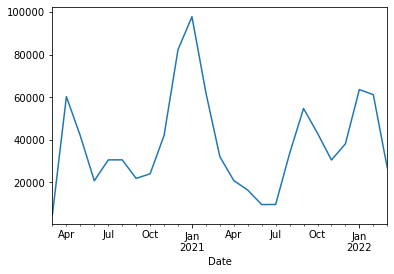

In [10]:
#Plot monthly trend
df_monthly.plot()

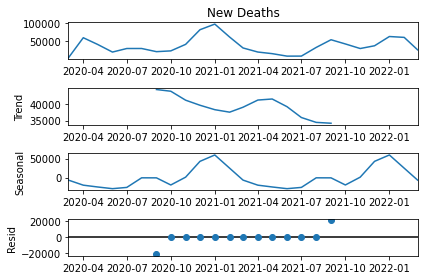

In [11]:
#Show the decomposition of the monthly trend into seasons / trends / residuals

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_monthly,model='additive')
fig=decomposition.plot()
plt.show()

In [12]:
#From the graphs above, we can see that the monthly data is seasonal - it spikes in January
#We also observe an overall downward trend of COVID-19 deaths

### Exploring the daily trend of COVID-19 deaths from March 2021 to May 2021 (2 months)

In [13]:
#Limit data to 2 months
df_daily_2m = df_daily[(df_daily['Date'] <= '2021-06-01')&(df_daily['Date']>='2021-04-01')]


In [14]:
df_daily_2m.head()

,Date,New Deaths
299,2021-06-01,337
300,2021-05-31,228
301,2021-05-30,255
302,2021-05-29,310
303,2021-05-28,707


In [15]:
#Set the Date as the index to allow for plotting
df_daily_2m.set_index('Date',inplace=True)

#Make a copy of df_daily_2m to make it an object
obj_daily_2m=df_daily_2m['New Deaths'].resample('D').sum()
obj_daily_2m.head()

Date
2021-04-01    817
2021-04-02    844
2021-04-03    744
2021-04-04    519
2021-04-05    375
Freq: D, Name: New Deaths, dtype: int64

<AxesSubplot:xlabel='Date'>

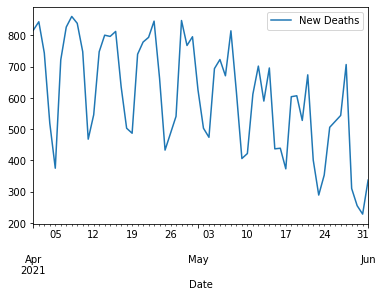

In [16]:
df_daily_2m.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

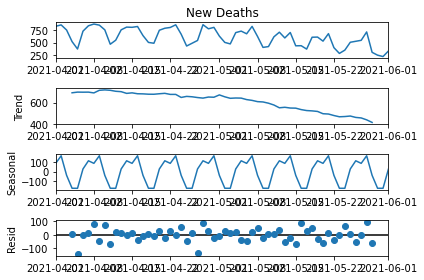

In [17]:
#Show seasonal trends for daily COVID-19 death rates

decomposition2 = sm.tsa.seasonal_decompose(obj_daily_2m,model='additive')
fig=decomposition2.plot()
plt.show

### Observations from Exploratory Analysis + Choosing our Model

Both monthly and daily COVID-19 death rates show non-stationarity (both trends and seasonal changes), which may lead to inaccurate forecasts. Hence, a model must be chosen to account for this non-stationarity.

**We have chosen the Autoregressive Integrated Moving Average (ARIMA) model** as it helps us to account for stationarity, while helping us to determine the number of variables to regress the independent variable, COVID-19 death count, on.

Upon doing some research, we found that the ARIMA model is not very accurate in making long-term forecasts (months ahead). Hence, we decided to use only 2 months of data to forecast COVID-19 death rates up to 1 week in advance.




## Using the ARIMA model for forecasting
In order to find the best model for forecasting, we need to determine the parameters of the ARIMA model, namely:

**p: the number of autoregressive terms**

**d: the number of nonseasonal differences needed for stationarity**

**q: the number of lagged forecast errors in the prediction equation.**

### Determining parameter d, the number of nonseasonal differences for stationarity

We use both ACF graphs and Augmented Dicky-Fuller tests to determine the number of differences needed (value of d)

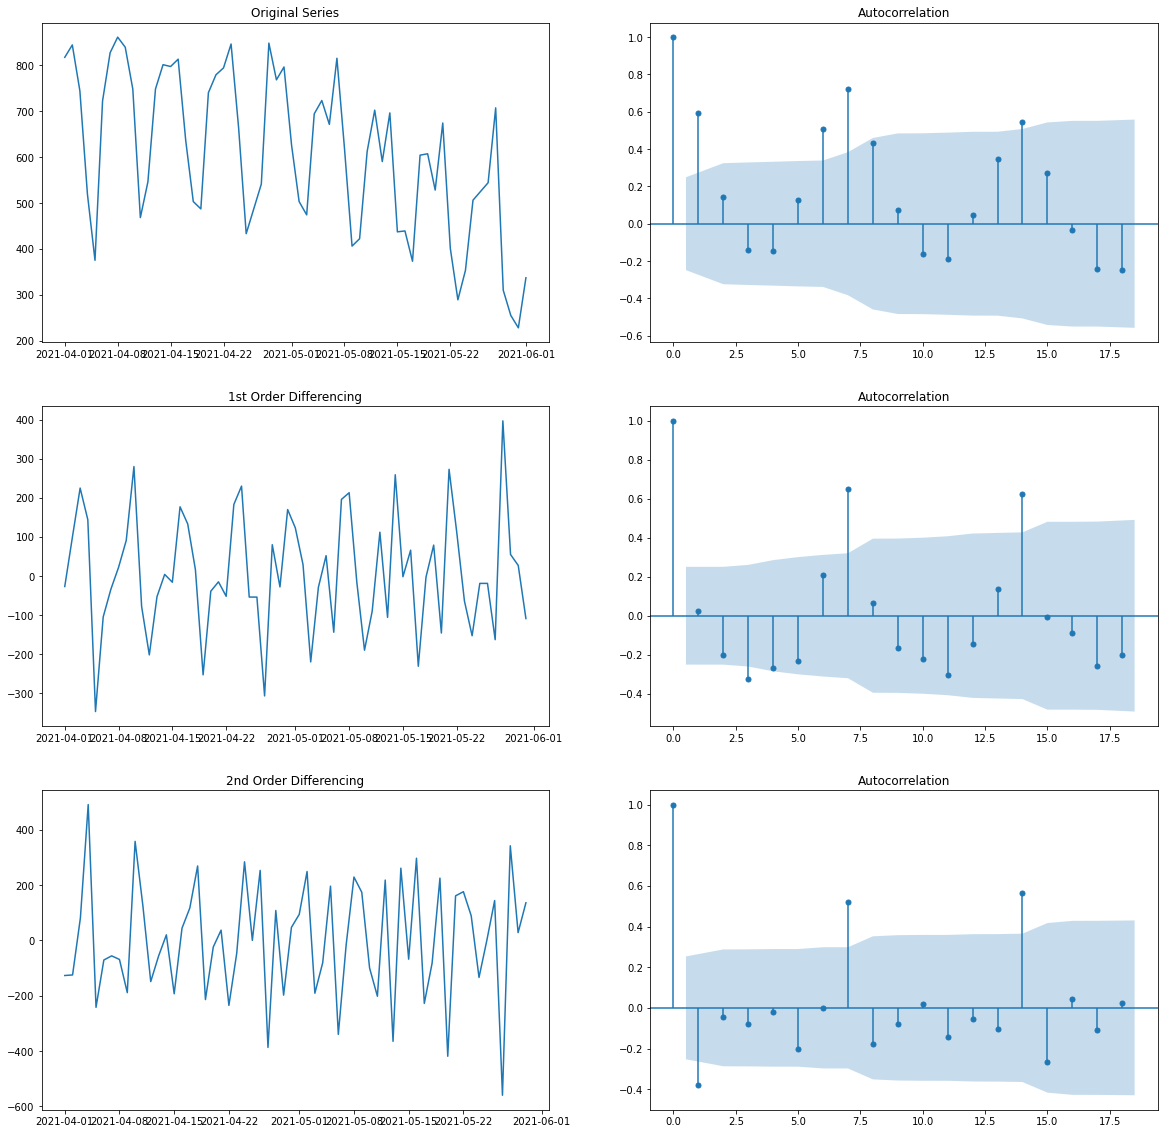

In [18]:
#Plotting ACF graphs

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes[0, 0].plot(df_daily_2m['New Deaths']); axes[0, 0].set_title('Original Series')
plot_acf(df_daily_2m['New Deaths'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_daily_2m['New Deaths'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_daily_2m['New Deaths'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_daily_2m['New Deaths'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_daily_2m['New Deaths'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [19]:
#Calculating p-values for Augmented Dicky-Fuller (adfuller) Tests
from statsmodels.tsa.stattools import adfuller

deathCountList_d0 =[]
for i in df_daily_2m['New Deaths']:
    if np.isnan(i) == False:
        deathCountList_d0.append(i)

deathCountList_d1 =[]
for i in df_daily_2m['New Deaths'].diff():
    if np.isnan(i) == False:
        deathCountList_d1.append(i)
        
deathCountList_d2 =[]
for i in df_daily_2m['New Deaths'].diff().diff():
    if np.isnan(i) == False:
        deathCountList_d2.append(i)
        

print('The p-value of adfuller test for d = 0 is:', adfuller(deathCountList_d0)[1])
print('The p-value of adfuller test for d = 1 is:', adfuller(deathCountList_d1)[1])
print('The p-value of adfuller test for d = 2 is:', adfuller(deathCountList_d2)[1])


The p-value of adfuller test for d = 0 is: 0.04205248959325696
The p-value of adfuller test for d = 1 is: 6.635483884472177e-27
The p-value of adfuller test for d = 2 is: 0.01884849890337963


#### Since the p-value of the adfuller test is only < 0.05 for d = 2, we will use d = 2 in our ARIMA model

### Determining the other ARIMA parameters (p and q)

In [20]:
#Split the data into train and test data: We are using 80% of data as training data
#We do not randomise the train & test data as we are comparing the forecast (from the train data) with the test data
#Hence, the test data will have to come chronologically after the train data
#The order of the data is important for time-series analysis
train=obj_daily_2m[:int((80*len(df_daily_2m))/100)] 
test=obj_daily_2m[int((80*len(df_daily_2m))/100):]
train

Date
2021-04-01    817
2021-04-02    844
2021-04-03    744
2021-04-04    519
2021-04-05    375
2021-04-06    722
2021-04-07    827
2021-04-08    861
2021-04-09    839
2021-04-10    748
2021-04-11    468
2021-04-12    546
2021-04-13    748
2021-04-14    801
2021-04-15    797
2021-04-16    813
2021-04-17    636
2021-04-18    503
2021-04-19    487
2021-04-20    740
2021-04-21    779
2021-04-22    794
2021-04-23    846
2021-04-24    663
2021-04-25    433
2021-04-26    487
2021-04-27    541
2021-04-28    848
2021-04-29    768
2021-04-30    796
2021-05-01    626
2021-05-02    503
2021-05-03    474
2021-05-04    694
2021-05-05    723
2021-05-06    671
2021-05-07    815
2021-05-08    619
2021-05-09    406
2021-05-10    422
2021-05-11    612
2021-05-12    702
2021-05-13    590
2021-05-14    696
2021-05-15    437
2021-05-16    439
2021-05-17    373
2021-05-18    604
2021-05-19    607
Freq: D, Name: New Deaths, dtype: int64

In [21]:
#Find all combinations of p, d and q through iteration

from statsmodels.tsa.arima.model import ARIMA
import itertools

p = range(0,10) #We selected the maximum value of p to be 10 to prevent overfitting
q = range(0,10) #We selected the maximum value of q to be 10 to prevent overfitting
d = range(2,3) #Determined earlier that d=2

pdq_combination=list(itertools.product(p,d,q))
len(pdq_combination)

100

In [22]:
#List all combinations of (p,d,q) to check
pdq_combination

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 2, 9),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 2, 6),
 (2, 2, 7),
 (2, 2, 8),
 (2, 2, 9),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3, 2, 6),
 (3, 2, 7),
 (3, 2, 8),
 (3, 2, 9),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 2, 5),
 (4, 2, 6),
 (4, 2, 7),
 (4, 2, 8),
 (4, 2, 9),
 (5, 2, 0),
 (5, 2, 1),
 (5, 2, 2),
 (5, 2, 3),
 (5, 2, 4),
 (5, 2, 5),
 (5, 2, 6),
 (5, 2, 7),
 (5, 2, 8),
 (5, 2, 9),
 (6, 2, 0),
 (6, 2, 1),
 (6, 2, 2),
 (6, 2, 3),
 (6, 2, 4),
 (6, 2, 5),
 (6, 2, 6),
 (6, 2, 7),
 (6, 2, 8),
 (6, 2, 9),
 (7, 2, 0),
 (7, 2, 1),
 (7, 2, 2),
 (7, 2, 3),
 (7, 2, 4),
 (7, 2, 5),
 (7, 2, 6),
 (7, 2, 7),
 (7, 2, 8),
 (7, 2, 9),
 (8, 2, 0),
 (8, 2, 1),
 (8, 2, 2),
 (8,

### Using Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to determine the best ARIMA model

The AIC and BIC are ways to 'score' the ARIMA models - essentially, the ARIMA model with the lowest AIC/BIC (either one) will be the best model for forecasting.

In [23]:
import warnings
warnings.filterwarnings('ignore')

#Creating lists to store the values of AIC, BIC & respective (p,d,q) combinations
aic=[]
bic=[]
pdqCombs=[]

#This loop will try every combination of (p,d,q) in ARIMA models and calculate the AIC & BIC
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(df_daily_2m)-1))
        model_aic=model.aic
        model_bic=model.bic
        pdqCombs.append(pdq)
        aic.append(model_aic)
        bic.append(model_bic)
    
    except:
        continue

In [24]:
#Put the results into a dataframe
results1 = pd.DataFrame(index=pdqCombs, data=aic, columns=['AIC'])
results1['BIC']=bic
results1

,AIC,BIC
"(0, 2, 0)",634.639266,636.489414
"(0, 2, 1)",612.233027,615.933322
"(0, 2, 2)",613.461413,619.011856
"(0, 2, 3)",603.242982,610.643572
"(0, 2, 4)",600.565858,609.816596
...,...,...
"(9, 2, 5)",564.343271,592.095485
"(9, 2, 6)",562.179135,591.781497
"(9, 2, 7)",574.313621,605.766130
"(9, 2, 8)",572.366009,605.668666


In [25]:
print(results1[['AIC']].min())
print(results1[['BIC']].min())

#Since AIC < BIC, we will use the p,d,q values for the index with the lowest AIC

AIC    556.750113
dtype: float64
BIC    571.551294
dtype: float64


In [26]:
#To find the index - the p,d,q values - that give the lowest AIC values
establishedmodel=results1['AIC'].idxmin()
establishedmodel

(6, 2, 1)

In [27]:
#Train the ARIMA model with the (p,d,q) obtained for the lowest AIC, (6,2,1)
model=ARIMA(train,order=establishedmodel).fit()

In [28]:
#Predict the values of COVID-19 death counts for the duration of the test data
pred=model.predict(start=len(train),end=(len(df_daily_2m)-1))
pred

2021-05-20    640.801296
2021-05-21    589.721767
2021-05-22    460.142927
2021-05-23    372.229076
2021-05-24    404.611471
2021-05-25    552.075655
2021-05-26    589.473880
2021-05-27    615.149244
2021-05-28    547.747435
2021-05-29    433.879883
2021-05-30    346.251377
2021-05-31    405.685016
2021-06-01    514.315921
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
train

Date
2021-04-01    817
2021-04-02    844
2021-04-03    744
2021-04-04    519
2021-04-05    375
2021-04-06    722
2021-04-07    827
2021-04-08    861
2021-04-09    839
2021-04-10    748
2021-04-11    468
2021-04-12    546
2021-04-13    748
2021-04-14    801
2021-04-15    797
2021-04-16    813
2021-04-17    636
2021-04-18    503
2021-04-19    487
2021-04-20    740
2021-04-21    779
2021-04-22    794
2021-04-23    846
2021-04-24    663
2021-04-25    433
2021-04-26    487
2021-04-27    541
2021-04-28    848
2021-04-29    768
2021-04-30    796
2021-05-01    626
2021-05-02    503
2021-05-03    474
2021-05-04    694
2021-05-05    723
2021-05-06    671
2021-05-07    815
2021-05-08    619
2021-05-09    406
2021-05-10    422
2021-05-11    612
2021-05-12    702
2021-05-13    590
2021-05-14    696
2021-05-15    437
2021-05-16    439
2021-05-17    373
2021-05-18    604
2021-05-19    607
Freq: D, Name: New Deaths, dtype: int64

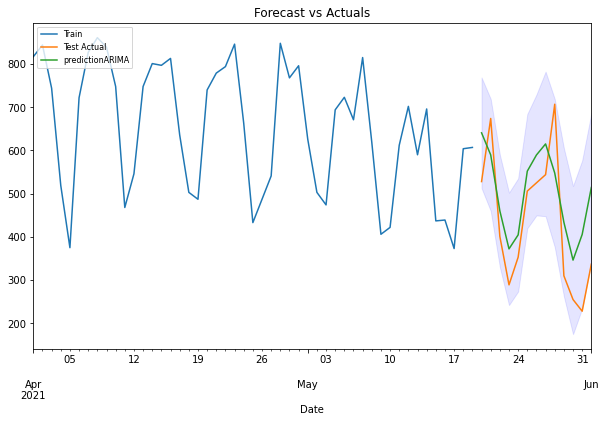

In [30]:
#Plot graphs
train.plot(legend=True, label='Train', figsize=(10,6)) # Plot train data
test.plot(legend=True, label='Test Actual') # Plot test data (Actual Death Counts)
pred.plot(legend=True, label='predictionARIMA') # Plot predicted values

#Calculate and plot confidence intervals
forecasts=model.get_forecast(13) #95% confidence interval
ci=forecasts.conf_int()
lower_series = pd.Series(ci.loc[:,'lower New Deaths'])
upper_series = pd.Series(ci.loc[:,'upper New Deaths'])

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='b', alpha=.1)

#Title and legend
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [31]:
#Future predictions (6 days in the future since max(p,q) = 6)
final_model=ARIMA(obj_daily_2m,order=establishedmodel).fit()
prediction=final_model.predict(start=len(obj_daily_2m),end=len(obj_daily_2m)+5)

Text(0.5, 1.0, '6 days Forecast')

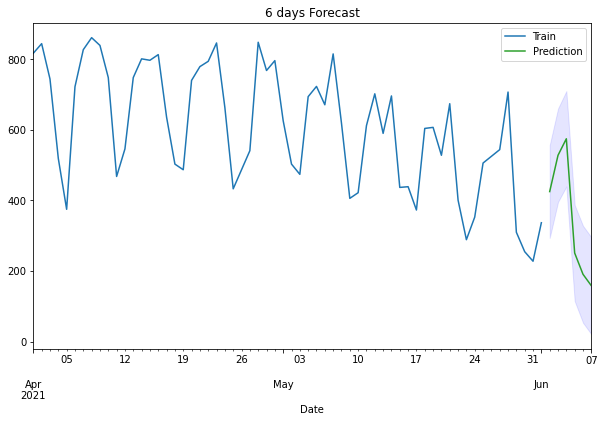

In [32]:
#Plot future predictions
forecasts2=final_model.get_forecast(6) #95% confidence interval
ci2=forecasts2.conf_int()
obj_daily_2m.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='Prediction',color='#2ca02c')
lower_series2 = pd.Series(ci2.loc[:,'lower New Deaths'])
upper_series2 = pd.Series(ci2.loc[:,'upper New Deaths'])
plt.fill_between(lower_series2.index, lower_series2, upper_series2, 
                 color='b', alpha=.1)
plt.title('6 days Forecast')

### Repeating ML technique on dataset from  from Jan 2022 to March 2022 (2 months) to check for reliability

In [33]:
df_daily_2m2 = df_daily[(df_daily['Date'] <= '2022-03-27')&(df_daily['Date']>='2022-01-27')]


In [34]:
df_daily_2m2.head()

,Date,New Deaths
0,2022-03-27,47
1,2022-03-26,129
2,2022-03-25,739
3,2022-03-24,862
4,2022-03-23,1274


In [35]:
#Set the Date as the index to allow for plotting
df_daily_2m2.set_index('Date',inplace=True)

#Make a copy of df_daily_2m to make it an object
obj_daily_2m2=df_daily_2m2['New Deaths'].resample('D').sum()
obj_daily_2m2.head()

Date
2022-01-27    2841
2022-01-28    3457
2022-01-29    1504
2022-01-30     897
2022-01-31    2645
Freq: D, Name: New Deaths, dtype: int64

<AxesSubplot:xlabel='Date'>

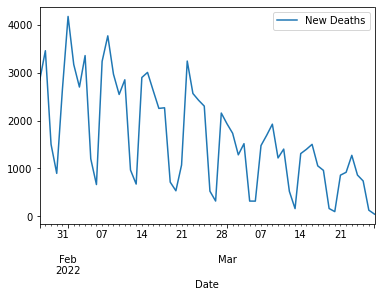

In [36]:
df_daily_2m2.plot()

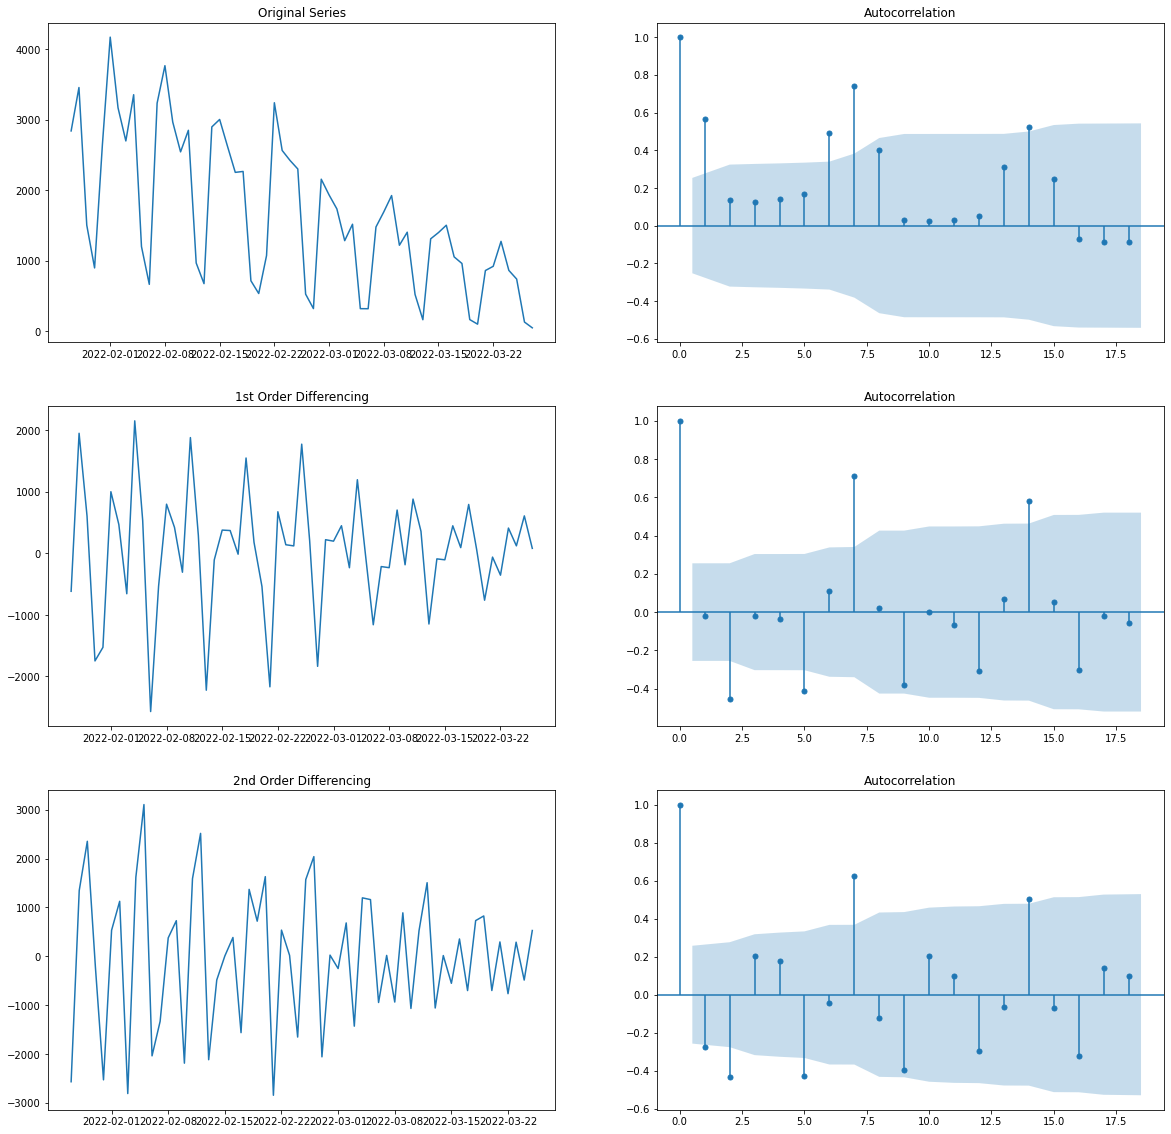

In [37]:
#Plotting ACF graphs

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes[0, 0].plot(df_daily_2m2['New Deaths']); axes[0, 0].set_title('Original Series')
plot_acf(df_daily_2m2['New Deaths'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_daily_2m2['New Deaths'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_daily_2m2['New Deaths'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_daily_2m2['New Deaths'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_daily_2m2['New Deaths'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [38]:
#Calculating p-values for Augmented Dicky-Fuller (adfuller) Tests

deathCountList2_d0 =[]
for i in df_daily_2m2['New Deaths']:
    if np.isnan(i) == False:
        deathCountList2_d0.append(i)

deathCountList2_d1 =[]
for i in df_daily_2m2['New Deaths'].diff():
    if np.isnan(i) == False:
        deathCountList2_d1.append(i)
        
deathCountList2_d2 =[]
for i in df_daily_2m2['New Deaths'].diff().diff():
    if np.isnan(i) == False:
        deathCountList2_d2.append(i)
        

print('The p-value of adfuller test for d = 0 is:', adfuller(deathCountList2_d0)[1])
print('The p-value of adfuller test for d = 1 is:', adfuller(deathCountList2_d1)[1])
print('The p-value of adfuller test for d = 2 is:', adfuller(deathCountList2_d2)[1])


The p-value of adfuller test for d = 0 is: 0.9315000968711932
The p-value of adfuller test for d = 1 is: 1.5385170286095932e-27
The p-value of adfuller test for d = 2 is: 2.2801246453366213e-05


In [39]:
#Split the data into train and test data: We are using 80% of data as training data
#We do not randomise the train & test data as we are comparing the forecast (from the train data) with the test data
#Hence, the test data will have to come chronologically after the train data
#The order of the data is important for time-series analysis
train2=obj_daily_2m2[:int((80*len(df_daily_2m))/100)] 
test2=obj_daily_2m2[int((80*len(df_daily_2m))/100):]
train2.head()

Date
2022-01-27    2841
2022-01-28    3457
2022-01-29    1504
2022-01-30     897
2022-01-31    2645
Freq: D, Name: New Deaths, dtype: int64

In [40]:
#Check the number of train & test data points
print('Total data points:', len(df_daily_2m2))
print('Training data points:',len(train2))
print('Testing data points:',len(test2))

Total data points: 60
Training data points: 49
Testing data points: 11


In [41]:
p2 = range(0,10) #We selected the maximum value of p to be 10 to prevent overfitting
q2 = range(0,10) #We selected the maximum value of q to be 10 to prevent overfitting
d2 = range(1,2) #Determined earlier that d=1

pdq_combination2=list(itertools.product(p2,d2,q2))
len(pdq_combination2)

100

In [42]:
#List all combinations of (p,d,q) to check
pdq_combination2

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 1, 8),
 (1, 1, 9),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (2, 1, 8),
 (2, 1, 9),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (3, 1, 8),
 (3, 1, 9),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (4, 1, 8),
 (4, 1, 9),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (5, 1, 8),
 (5, 1, 9),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (6, 1, 8),
 (6, 1, 9),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7),
 (7, 1, 8),
 (7, 1, 9),
 (8, 1, 0),
 (8, 1, 1),
 (8, 1, 2),
 (8,

In [43]:
#Creating lists to store the values of AIC, BIC & respective (p,d,q) combinations
aic2=[]
bic2=[]
pdqCombs2=[]


#This loop will try every combination of (p,d,q) in ARIMA models and calculate the AIC & BIC
for pdq in pdq_combination2:
    try:
        model2=ARIMA(train2,order=pdq).fit()
        pred2=model2.predict(start=len(train2),end=(len(df_daily_2m2)-1))
        model_aic=model2.aic
        model_bic=model2.bic
        pdqCombs2.append(pdq)
        aic2.append(model_aic)
        bic2.append(model_bic)
    
    except:
        continue

In [44]:
#Put the results into a dataframe
results2 = pd.DataFrame(index=pdqCombs2, data=aic2, columns=['AIC'])
results2['BIC']=bic2
results2

,AIC,BIC
"(0, 1, 0)",806.757945,808.629146
"(0, 1, 1)",802.209476,805.951878
"(0, 1, 2)",787.811414,793.425017
"(0, 1, 3)",789.771848,797.256652
"(0, 1, 4)",782.127589,791.483594
...,...,...
"(9, 1, 5)",762.217947,790.285962
"(9, 1, 6)",763.448341,793.387557
"(9, 1, 7)",775.309408,807.119825
"(9, 1, 8)",786.717919,820.399537


In [45]:
print(results2[['AIC']].min())
print(results2[['BIC']].min())

#Since AIC < BIC, we will use the p,d,q values for the index with the lowest AIC

AIC    753.161073
dtype: float64
BIC    766.941562
dtype: float64


In [46]:
establishedmodel2=results2['AIC'].idxmin()
establishedmodel2

(8, 1, 0)

In [47]:
#Train the ARIMA model with the (p,d,q) obtained for the lowest AIC, (8,1,0)
model2=ARIMA(train2,order=establishedmodel2).fit()

In [48]:
#Predict the values of COVID-19 death counts for the duration of the test data
pred2=model2.predict(start=len(train2),end=(len(obj_daily_2m2)-1))
pred2

2022-03-17    1367.950297
2022-03-18    1104.422258
2022-03-19     549.982456
2022-03-20     324.362545
2022-03-21    1144.069904
2022-03-22    1522.654913
2022-03-23    1353.712762
2022-03-24    1371.989893
2022-03-25    1085.574464
2022-03-26     523.581629
2022-03-27     462.553745
Freq: D, Name: predicted_mean, dtype: float64

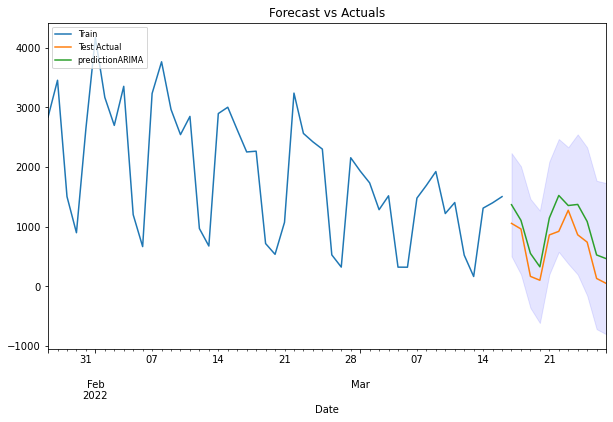

In [49]:
#Plot graphs
train2.plot(legend=True, label='Train', figsize=(10,6)) # Plot train data
test2.plot(legend=True, label='Test Actual') # Plot test data (Actual Death Counts)
pred2.plot(legend=True, label='predictionARIMA') # Plot predicted values
""
#Calculate and plot confidence intervals
forecasts2=model2.get_forecast(13) #95% confidence interval
ci2=forecasts2.conf_int()
lower_series2 = pd.Series(ci2.loc[:,'lower New Deaths'])
upper_series2 = pd.Series(ci2.loc[:,'upper New Deaths'])

plt.fill_between(lower_series2.index, lower_series2, upper_series2, 
                 color='b', alpha=.1)

#Title and legend
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [50]:
#Future predictions (8 days in the future since max(p,q) = 8)
final_model2=ARIMA(obj_daily_2m2,order=establishedmodel2).fit()
prediction2=final_model2.predict(start=len(obj_daily_2m2),end=len(obj_daily_2m2)+8-1)

Text(0.5, 1.0, '8 days Forecast')

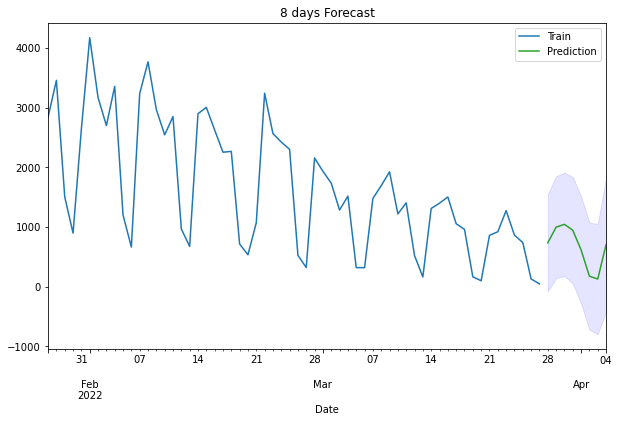

In [51]:
#Plot future predictions
forecasts2_2=final_model2.get_forecast(8) #95% confidence interval
ci2_2=forecasts2_2.conf_int()
obj_daily_2m2.plot(legend=True, label='Train', figsize=(10,6))
prediction2.plot(legend=True, label='Prediction',color='#2ca02c')
lower_series2_2 = pd.Series(ci2_2.loc[:,'lower New Deaths'])
upper_series2_2 = pd.Series(ci2_2.loc[:,'upper New Deaths'])
plt.fill_between(lower_series2_2.index, lower_series2_2, upper_series2_2, 
                 color='b', alpha=.1)
plt.title('8 days Forecast')

### To conclude:

The ARIMA model is an appropriate model to forecast COVID-19 death rates albeit only for the short run (~1 week). It is expected as the COVID-19 pandemic is extremely volatile and constant policy changes within a few weeks is expected, especially in a country with such a large population like the US. However, these results will be extremely useful, especially if it is also scoped down to state levels, for officials to better monitor the COVID-19 situation for policy making.
